In [11]:
import pandas as pd

In [12]:
target_df = pd.read_csv("/home/maxc/workspace/kaggle-hms/folds/all_targets.csv")
target_columns = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
target_df.describe()

target_column_df = target_df[target_columns]
import numpy as np
print(np.allclose(target_column_df.sum(axis=1), 1))

True


In [13]:
train_fold_path = "/home/maxc/workspace/kaggle-hms/folds/train_fold_0.csv"
val_fold_path = "/home/maxc/workspace/kaggle-hms/folds/val_fold_0.csv"

total_vote
3    51867
1     4360
5     3974
4     3451
2     2316
6      883
Name: count, dtype: int64
total_vote
15    10665
13     7525
16     5191
12     4356
14     3887
11     2602
18     1934
17     1445
10     1146
20      634
19      250
21      179
22       54
23       24
25       20
24       17
26        6
28        6
27        5
Name: count, dtype: int64
39946
203565 3.045055421758837
571133 14.297626796174836


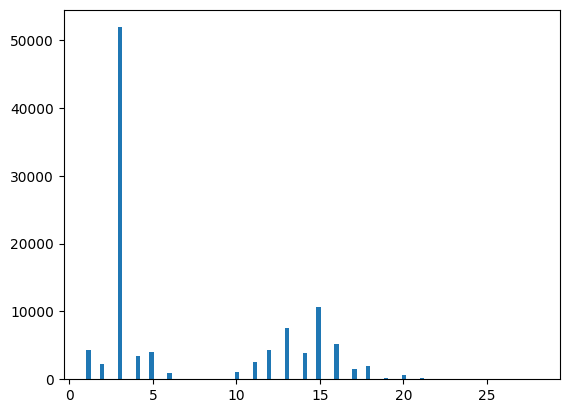

In [9]:
target_df = pd.concat([pd.read_csv(train_fold_path), pd.read_csv(val_fold_path)])
target_df["total_vote"] = target_df[target_columns].sum(axis=1)
import matplotlib.pyplot as plt
plt.hist(target_df["total_vote"], bins=100)

# get the sum of votes for total vote less than 7
target_df_fold_less_than_7 = target_df[target_df["total_vote"] < 7]
print(target_df_fold_less_than_7["total_vote"].value_counts())

l7_sum = 0
for i in range(7):
    l7_sum += target_df_fold_less_than_7["total_vote"].value_counts().get(i, 0) * i
l7_mean = l7_sum / target_df_fold_less_than_7["total_vote"].value_counts().sum()



target_df_fold_greater_than_7 = target_df[target_df["total_vote"] > 7]
print(target_df_fold_greater_than_7["total_vote"].value_counts())
print(target_df_fold_greater_than_7["total_vote"].value_counts().sum())

g10_sum = 0
for i in range(9, 28):
    g10_sum += target_df_fold_greater_than_7["total_vote"].value_counts().get(i, 0) * i
g10_mean = g10_sum / target_df_fold_greater_than_7["total_vote"].value_counts().sum()
print(l7_sum, l7_mean)
print(g10_sum, g10_mean)

In [4]:
train_df = pd.read_csv(train_fold_path)
val_df = pd.read_csv(val_fold_path)
train_df.head()
print(train_df.shape, val_df.shape)

(84696, 22) (22104, 22)


In [5]:

# print the distribution of the number of eeg_sub_id in each eeg_id
print(train_df["eeg_id"].value_counts().to_list())
print(val_df["eeg_id"].value_counts().to_list())

unique_label_columns = ['eeg_id', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
train_df_fold = train_df.copy()
train_df_fold['unique_label'] = train_df_fold[unique_label_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)
print(train_df_fold['unique_label'].value_counts().to_list())
train_df_fold.head()


[664, 562, 531, 433, 416, 412, 286, 266, 253, 236, 234, 230, 226, 213, 210, 209, 206, 204, 202, 191, 184, 173, 172, 172, 168, 157, 151, 151, 150, 142, 135, 131, 125, 124, 123, 122, 122, 121, 118, 116, 116, 113, 111, 111, 109, 108, 107, 107, 106, 104, 100, 97, 97, 92, 91, 90, 90, 89, 89, 88, 88, 88, 87, 86, 85, 84, 82, 82, 82, 80, 79, 78, 77, 75, 74, 73, 73, 71, 71, 71, 71, 70, 70, 69, 69, 68, 68, 68, 68, 67, 66, 66, 66, 65, 64, 64, 63, 62, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 58, 58, 58, 57, 57, 57, 56, 56, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 37, 37, 

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,...,lrda_vote,grda_vote,other_vote,fold,central_id,nonoverlap_eeg_id,unique_label,unique_id,total_votes,kl_div
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,...,0,0,0,1,1628180742_0,1628180742_0,1628180742_3_0_0_0_0_0,1628180742_0,3,1.791759
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,...,0,0,0,1,1628180742_0,1628180742_0,1628180742_3_0_0_0_0_0,1628180742_1,3,1.791759
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,...,0,0,0,1,1628180742_0,1628180742_0,1628180742_3_0_0_0_0_0,1628180742_2,3,1.791759
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,...,0,0,0,1,1628180742_0,1628180742_0,1628180742_3_0_0_0_0_0,1628180742_3,3,1.791759
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,...,0,0,0,1,1628180742_1,1628180742_0,1628180742_3_0_0_0_0_0,1628180742_4,3,1.791759


27
total_vote
3    41068
1     3405
5     3382
4     2767
2     1933
6      815
Name: count, dtype: int64
total_vote
15    8199
13    5894
16    4063
12    3348
14    3167
11    1973
18    1597
17    1264
10     875
20     536
19     169
21     137
22      29
23      24
25      20
24      17
26       6
27       5
Name: count, dtype: int64
31323
163343 3.0605771032415214
449013 14.334929604444019


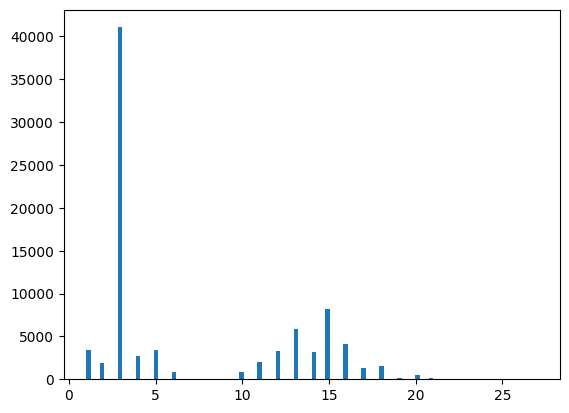

In [7]:

train_df_fold["total_vote"] = train_df_fold[unique_label_columns[1:]].sum(axis=1)
import matplotlib.pyplot as plt
plt.hist(train_df_fold["total_vote"], bins=100)
# print max total_vote
print(train_df_fold["total_vote"].max())

# get the sum of votes for total vote less than 7
train_df_fold_less_than_7 = train_df_fold[train_df_fold["total_vote"] < 7]
print(train_df_fold_less_than_7["total_vote"].value_counts())

l7_sum = 0
for i in range(7):
    l7_sum += train_df_fold_less_than_7["total_vote"].value_counts().get(i, 0) * i
l7_mean = l7_sum / train_df_fold_less_than_7["total_vote"].value_counts().sum()
train_df_fold_greater_than_7 = train_df_fold[train_df_fold["total_vote"] > 7]
print(train_df_fold_greater_than_7["total_vote"].value_counts())
print(train_df_fold_greater_than_7["total_vote"].value_counts().sum())

g10_sum = 0
for i in range(9, 28):
    g10_sum += train_df_fold_greater_than_7["total_vote"].value_counts().get(i, 0) * i

g10_mean = g10_sum / train_df_fold_greater_than_7["total_vote"].value_counts().sum()
print(l7_sum, l7_mean)

print(g10_sum, g10_mean)


In [9]:
val_target_df = val_df.copy()
target_sum = val_target_df[target_columns].sum(axis=1)
val_target_df['target_sum'] = target_sum
y_data = val_target_df[target_columns].values
y_data = y_data / y_data.sum(axis=1,keepdims=True)
val_target_df[target_columns] = y_data
val_target_df.head()

val_target_df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,fold,kl_div,target_sum
count,2.210400e+04,22104.000000,22104.000000,2.210400e+04,22104.000000,22104.000000,2.210400e+04,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000,22104.0,22104.000000,22104.000000
mean,2.127279e+09,34.438156,155.648751,1.109554e+09,64.928882,761.019815,2.139550e+09,29934.668522,0.231992,0.099636,0.171779,0.140619,0.169616,0.186358,0.0,1.391384,7.352063
std,1.208764e+09,92.590742,416.910620,5.964179e+08,151.549173,2264.471955,1.241426e+09,18391.879799,0.381132,0.233752,0.309671,0.276991,0.333467,0.300371,0.0,0.416239,5.656023
min,2.061593e+06,0.000000,0.000000,9.242340e+05,0.000000,0.000000,1.178890e+05,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.217662,1.000000
25%,1.056283e+09,1.000000,6.000000,6.674239e+08,2.000000,12.000000,1.065599e+09,15950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.112566,3.000000
50%,2.213584e+09,5.000000,28.000000,1.118454e+09,9.000000,70.000000,2.133393e+09,30631.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.399085,3.000000
75%,3.128605e+09,18.000000,90.000000,1.624572e+09,38.000000,466.000000,3.206309e+09,43892.000000,0.333333,0.000000,0.166667,0.083333,0.083333,0.307692,0.0,1.791759,13.000000
max,4.293306e+09,742.000000,3372.000000,2.146799e+09,1021.000000,17632.000000,4.294920e+09,65480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.791759,28.000000


In [10]:
print(len(train_df['unique_label'].unique()), len(train_df['eeg_id'].unique()))
print(len(val_df['unique_label'].unique()), len(val_df['eeg_id'].unique()))

16045 13671
4138 3418


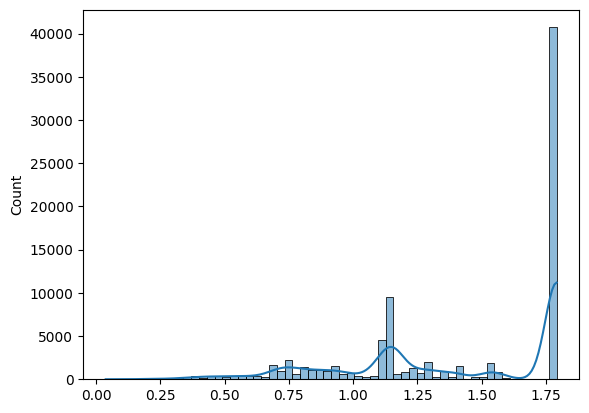

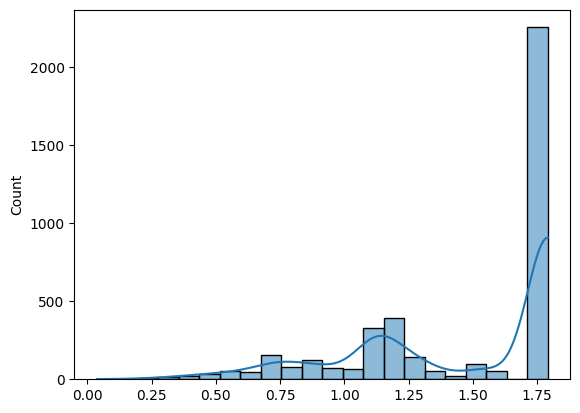

In [27]:
# plot the distribution of the kl divergence
import matplotlib.pyplot as plt
import seaborn as sns

train_kl_div = train_df['kl_div'].values
sns.histplot(train_kl_div, kde=True)
plt.show()
val_kl_div = val_df['kl_div'].values
sns.histplot(val_kl_div, kde=True)
plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_distribution(df):
    # plot the distribution of expert consensus
    target_order = df['expert_consensus'].value_counts().sort_index().index

    # get the ratio of each class
    ratio = df['expert_consensus'].value_counts(normalize=True).sort_index()
    print(ratio)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='expert_consensus', order=target_order)
    plt.title('Distribution of Expert Consensus')
    plt.xlabel('Expert Consensus')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [29]:
def plot_kl_div(df):
    kl_div = df['kl_div'].values
    sns.histplot(kl_div, kde=True)
    plt.show()

(5128, 20)
expert_consensus
GPD        0.111154
GRDA       0.065133
LPD        0.149766
LRDA       0.022231
Other      0.578978
Seizure    0.072738
Name: proportion, dtype: float64


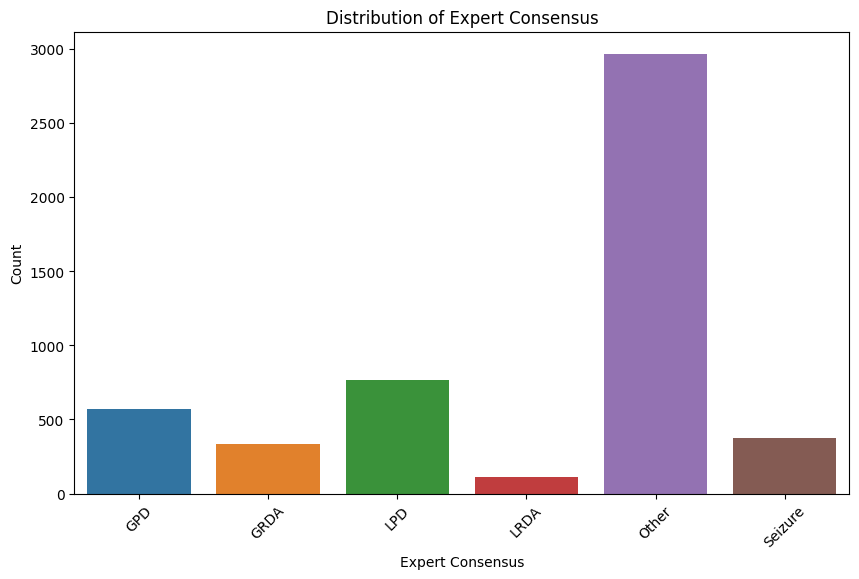

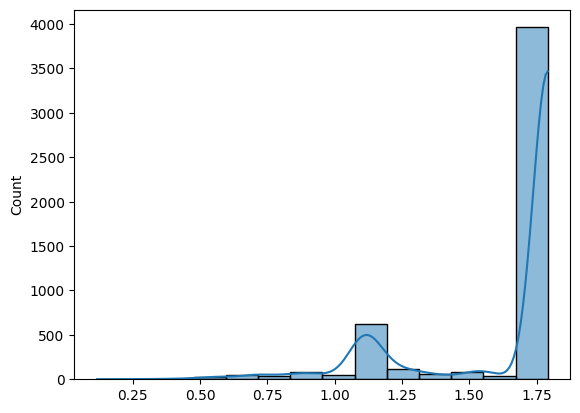

In [30]:
#generate a dataframe of the eeg_ids that have only one row
single_row_eeg_ids = train_df['eeg_id'].value_counts()
single_row_eeg_ids = single_row_eeg_ids[single_row_eeg_ids == 1]
single_row_eeg_ids = single_row_eeg_ids.index
single_row_df = train_df[train_df['eeg_id'].isin(single_row_eeg_ids)]
single_row_df.reset_index(drop=True, inplace=True)
print(single_row_df.shape)
single_row_df.head()
plot_distribution(single_row_df)
plot_kl_div(single_row_df)

In [13]:
print(train_df.shape)
print(val_df.shape)

(84696, 20)
(22104, 20)


In [14]:
print(len(train_df["eeg_id"].unique()))
print(len(val_df["eeg_id"].unique()))

13671
3418


expert_consensus
GPD        0.139747
GRDA       0.179300
LPD        0.145721
LRDA       0.157327
Other      0.183551
Seizure    0.194354
Name: proportion, dtype: float64


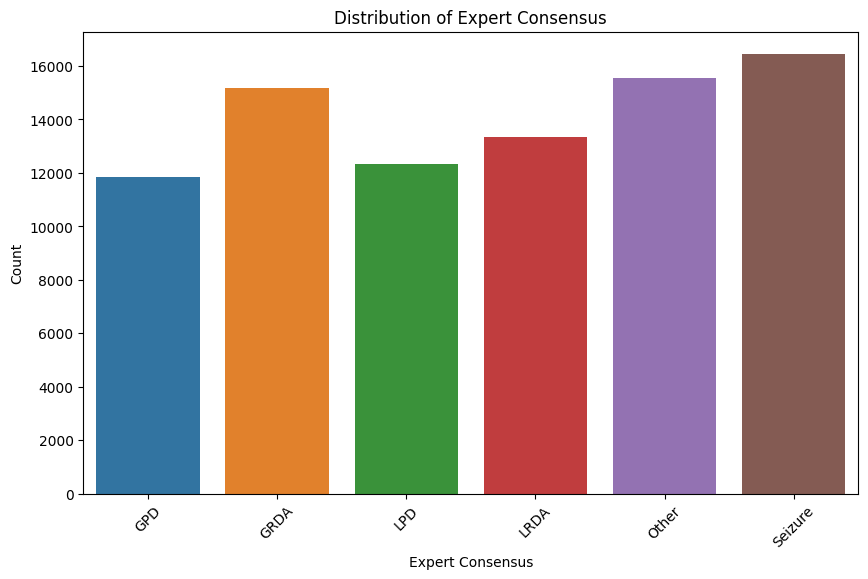

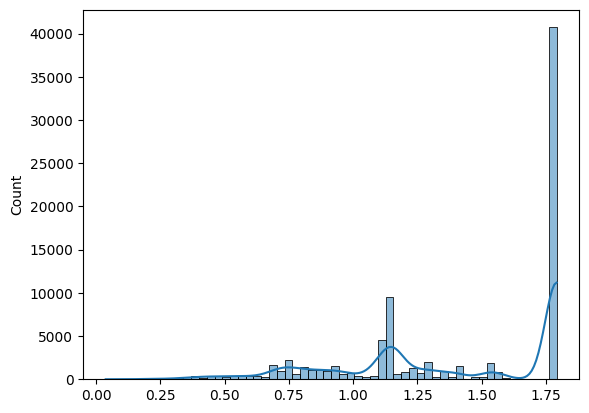

In [31]:
plot_distribution(train_df)
plot_kl_div(train_df)

expert_consensus
GPD        0.220141
GRDA       0.166260
LPD        0.113735
LRDA       0.149973
Other      0.147575
Seizure    0.202316
Name: proportion, dtype: float64


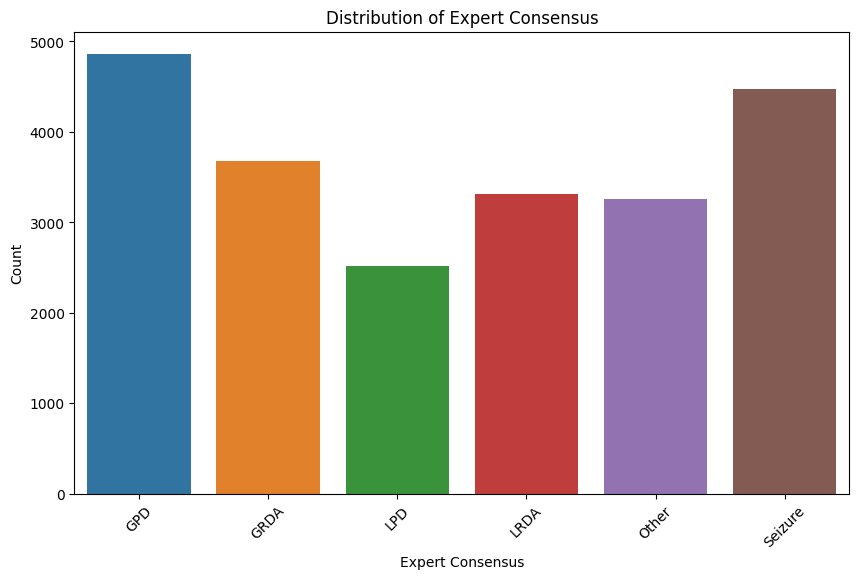

In [16]:
plot_distribution(val_df)

In [17]:
# group values by eeg_id and only keep the first row
sample_val_df_first = val_df.groupby("eeg_id").last().reset_index()
val_unique_label_df = val_df.groupby("unique_label").last().reset_index()
val_central_id_df = val_df.groupby("central_id").last().reset_index()
val_nonoverlap_eeg_id_df = val_df.groupby("nonoverlap_eeg_id").last().reset_index()


In [18]:
val_unique_label_df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,fold,kl_div
count,4.138000e+03,4138.000000,4138.000000,4.138000e+03,4138.000000,4138.000000,4.138000e+03,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000,4138.000000,4138.0,4138.000000
mean,2.101162e+09,6.805945,45.209280,1.107114e+09,48.057032,921.845336,2.145504e+09,31446.606815,0.853794,0.962784,0.932093,0.625906,0.630498,2.652489,0.0,1.418312
std,1.231159e+09,20.947759,146.713263,6.100032e+08,146.658859,2609.115091,1.239367e+09,16306.913787,1.690776,2.312553,2.523370,1.517037,1.565123,4.231238,0.0,0.430090
min,2.061593e+06,0.000000,0.000000,9.242340e+05,0.000000,0.000000,5.134612e+06,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.217662
25%,1.042572e+09,0.000000,0.000000,6.254528e+08,1.000000,6.000000,1.090365e+09,21312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.098612
50%,2.075636e+09,2.000000,10.000000,1.091111e+09,4.000000,48.000000,2.157051e+09,30631.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.791759
75%,3.144229e+09,7.000000,42.000000,1.675957e+09,14.000000,454.000000,3.221842e+09,42165.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.0,1.791759
max,4.293306e+09,742.000000,3372.000000,2.146799e+09,1021.000000,17632.000000,4.294920e+09,65480.000000,16.000000,16.000000,16.000000,12.000000,15.000000,24.000000,0.0,1.791759


In [19]:
val_central_id_df.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,fold,kl_div
count,7.375000e+03,7375.000000,7375.000000,7.375000e+03,7375.000000,7375.000000,7.375000e+03,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.0,7375.000000
mean,2.124481e+09,24.681763,124.802712,1.122180e+09,54.544949,762.270644,2.143667e+09,30127.154441,1.132068,0.842712,1.256542,0.625492,0.737085,2.117695,0.0,1.447845
std,1.217414e+09,77.535314,360.515421,6.082373e+08,142.121011,2224.774059,1.243377e+09,17742.744211,1.775789,2.229251,3.035113,1.565997,1.687765,3.920069,0.0,0.413778
min,2.061593e+06,0.000000,0.000000,9.242340e+05,0.000000,0.000000,4.409640e+05,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.217662
25%,1.073898e+09,1.000000,6.000000,6.564602e+08,2.000000,16.000000,1.056206e+09,17089.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.155245
50%,2.172212e+09,4.000000,26.000000,1.147161e+09,7.000000,72.000000,2.149316e+09,30539.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.791759
75%,3.127952e+09,12.000000,76.000000,1.680960e+09,25.000000,454.000000,3.217170e+09,42313.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,1.791759
max,4.293306e+09,742.000000,3372.000000,2.146799e+09,1021.000000,17632.000000,4.294920e+09,65480.000000,15.000000,16.000000,16.000000,12.000000,15.000000,24.000000,0.0,1.791759


expert_consensus
GPD        0.125805
GRDA       0.126975
LPD        0.110006
LRDA       0.064073
Other      0.404037
Seizure    0.169105
Name: proportion, dtype: float64


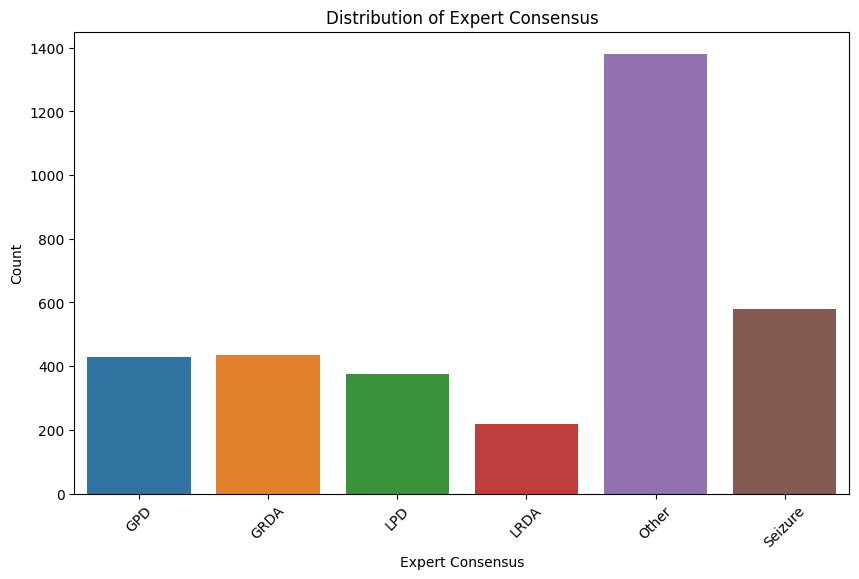

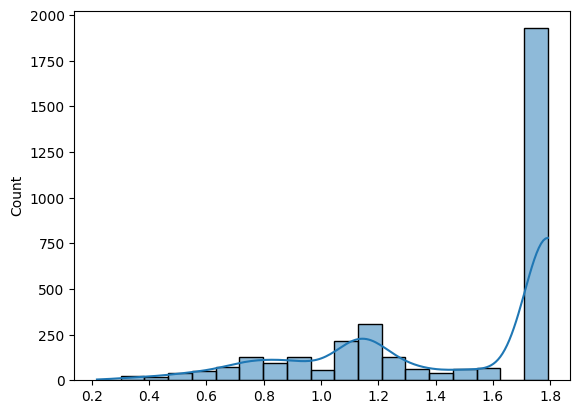

expert_consensus
GPD        0.128323
GRDA       0.109957
LPD        0.133639
LRDA       0.070565
Other      0.355244
Seizure    0.202272
Name: proportion, dtype: float64


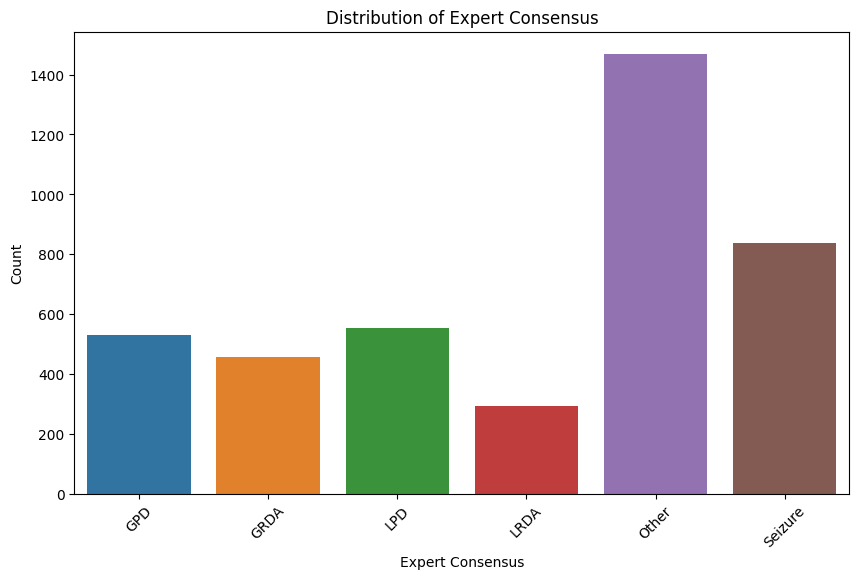

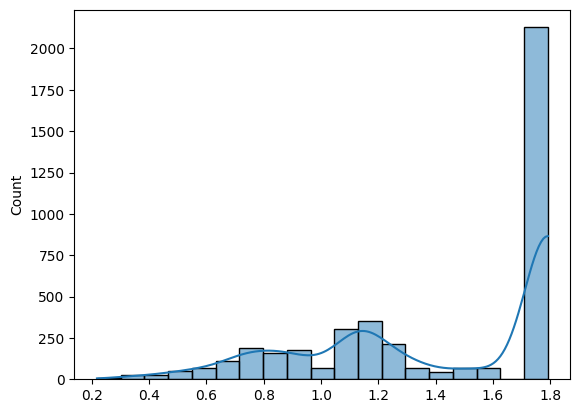

expert_consensus
GPD        0.171797
GRDA       0.143322
LPD        0.115390
LRDA       0.080678
Other      0.246102
Seizure    0.242712
Name: proportion, dtype: float64


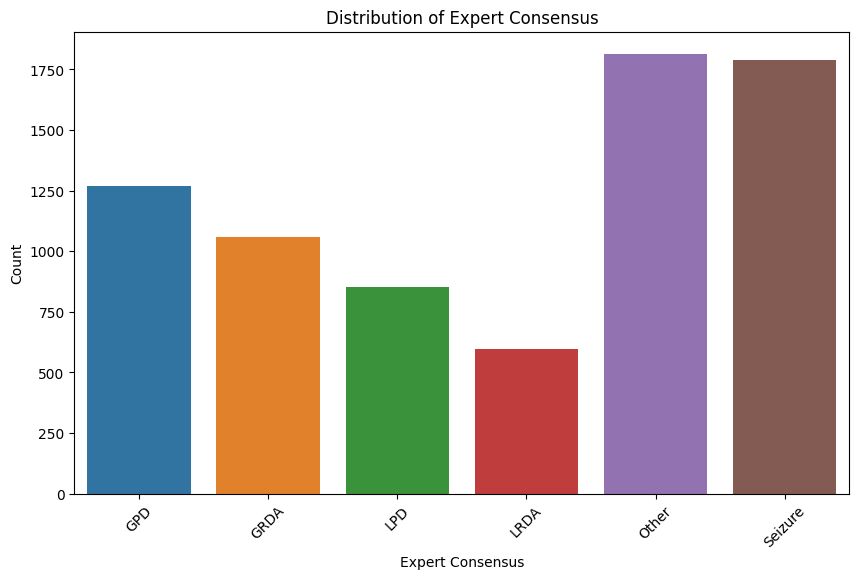

expert_consensus
GPD        0.171797
GRDA       0.143322
LPD        0.115390
LRDA       0.080678
Other      0.246102
Seizure    0.242712
Name: proportion, dtype: float64


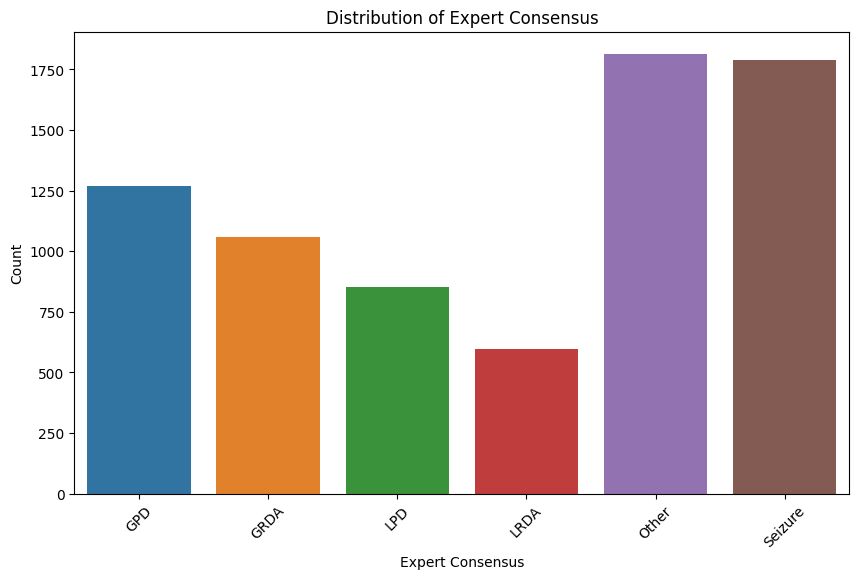

expert_consensus
GPD        0.158984
GRDA       0.135937
LPD        0.112889
LRDA       0.072343
Other      0.316901
Seizure    0.202945
Name: proportion, dtype: float64


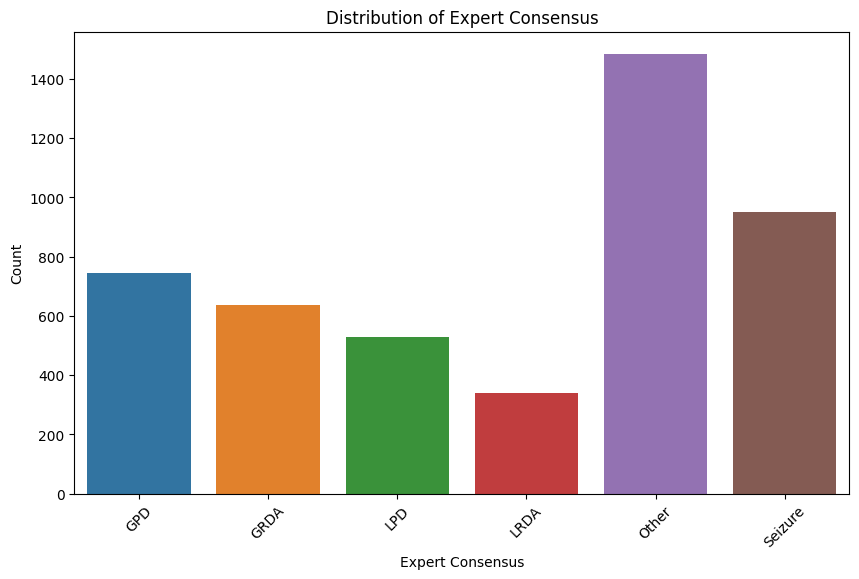

In [33]:
plot_distribution(sample_val_df_first)
plot_kl_div(sample_val_df_first)
plot_distribution(val_unique_label_df)
plot_kl_div(val_unique_label_df)
plot_distribution(val_central_id_df)
plot_distribution(val_central_id_df)
plot_distribution(val_nonoverlap_eeg_id_df)

expert_consensus
GPD        0.125219
GRDA       0.125805
LPD        0.109713
LRDA       0.061732
Other      0.408719
Seizure    0.168812
Name: proportion, dtype: float64


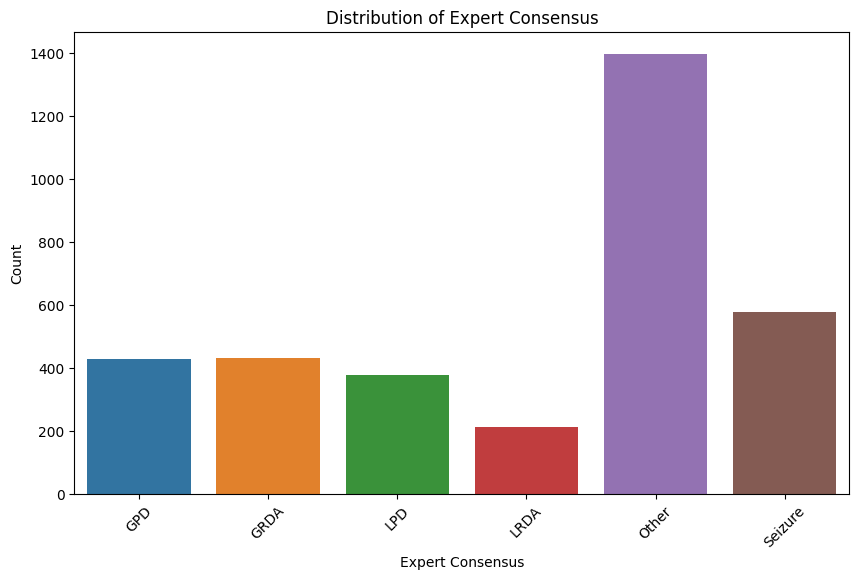

In [21]:
sample_val_df_last = val_df.groupby("eeg_id").first().reset_index(drop=True)
plot_distribution(sample_val_df_last)

In [22]:
# check if the two dataframes are the same
print(sample_val_df_first.equals(sample_val_df_last))

False


expert_consensus
GPD        0.099993
GRDA       0.102699
LPD        0.161656
LRDA       0.053617
Other      0.422061
Seizure    0.159974
Name: proportion, dtype: float64


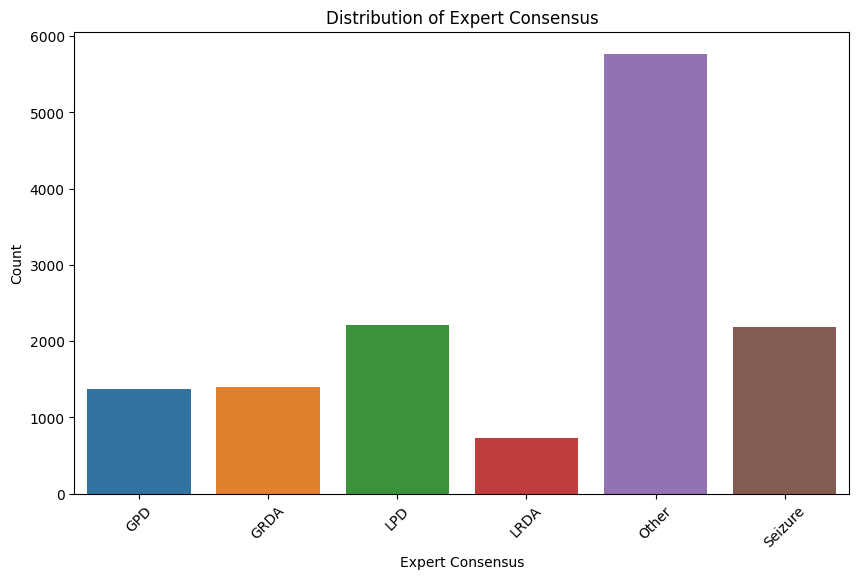

In [23]:
sample_train_df_random = train_df.groupby("eeg_id").sample(n=1).reset_index(drop=True)
plot_distribution(sample_train_df_random)

expert_consensus
GPD        0.128323
GRDA       0.109957
LPD        0.133639
LRDA       0.070565
Other      0.355244
Seizure    0.202272
Name: proportion, dtype: float64


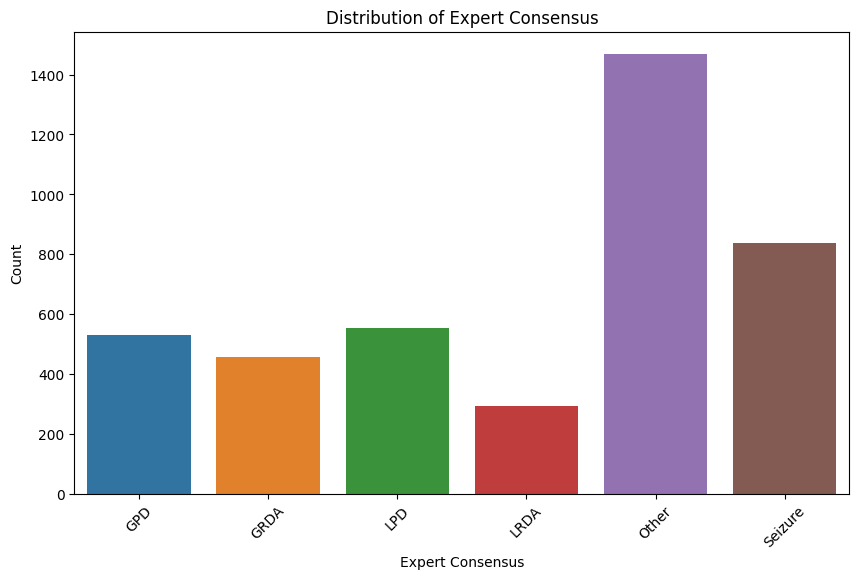

expert_consensus
GPD        0.088798
GRDA       0.073998
LPD        0.223782
LRDA       0.067874
Other      0.379434
Seizure    0.166114
Name: proportion, dtype: float64


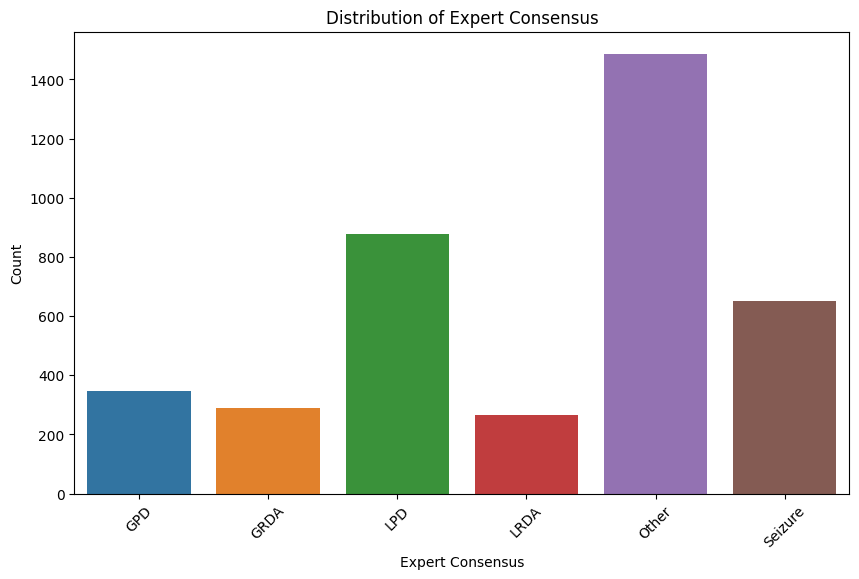

expert_consensus
GPD        0.101648
GRDA       0.095817
LPD        0.112294
LRDA       0.037009
Other      0.444613
Seizure    0.208619
Name: proportion, dtype: float64


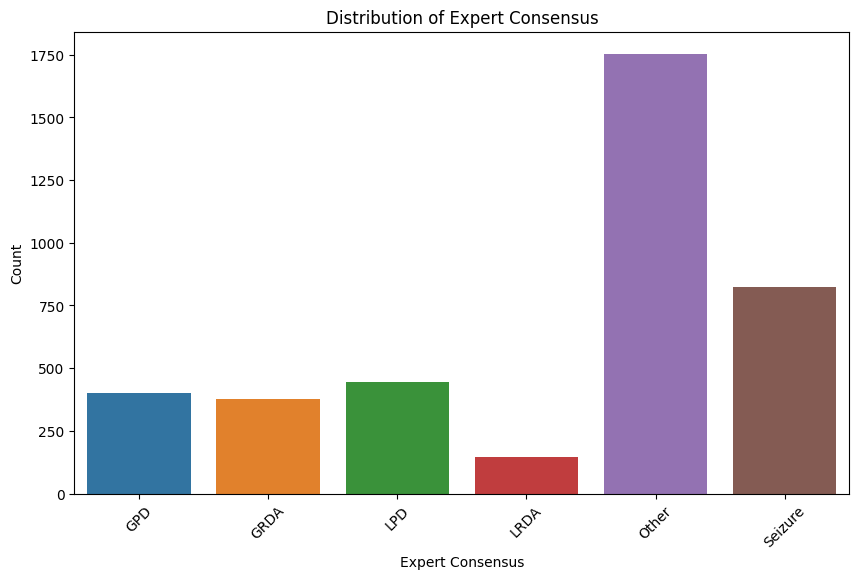

expert_consensus
GPD        0.058215
GRDA       0.118114
LPD        0.193409
LRDA       0.060380
Other      0.392831
Seizure    0.177051
Name: proportion, dtype: float64


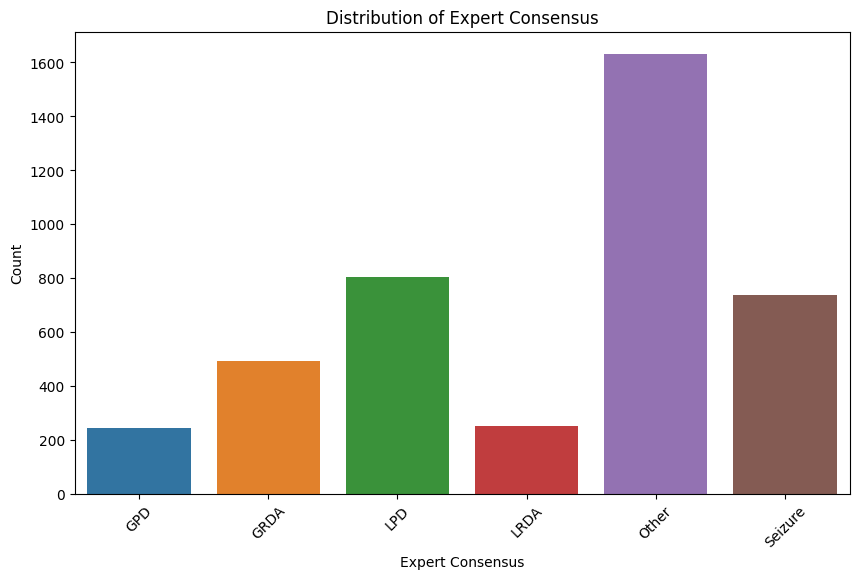

expert_consensus
GPD        0.138917
GRDA       0.078529
LPD        0.167247
LRDA       0.043986
Other      0.341203
Seizure    0.230119
Name: proportion, dtype: float64


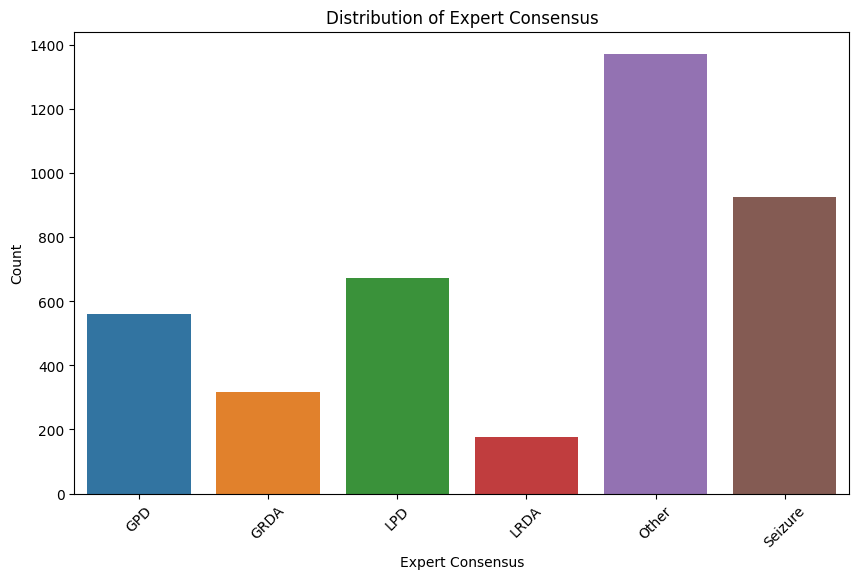

In [24]:
fold_dir = "/home/maxc/workspace/kaggle-hms/folds"
val_fold_paths = [f"{fold_dir}/val_fold_{i}.csv" for i in range(5)]

for val_fold_path in val_fold_paths:
    val_df = pd.read_csv(val_fold_path)
    val_df = val_df.groupby("unique_label").first().reset_index()
    plot_distribution(val_df)